In [497]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ["figure.figsize"] = 10,6
import seaborn as sns
from scipy import stats
import math
import datetime
import urllib
import zipfile
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import glob


In [393]:

#- instant: record index
#- dteday : date
#- season : season (1:winter, 2:spring, 3:summer, 4:fall)
#- yr : year (0: 2011, 1:2012)
#- mnth : month ( 1 to 12)
#- hr : hour (0 to 23)
#- holiday : weather day is holiday or not (extracted from [Web Link])
#- weekday : day of the week
#- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#+ weathersit :
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
#- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
#- hum: Normalized humidity. The values are divided to 100 (max)
#- windspeed: Normalized wind speed. The values are divided to 67 (max)
#- casual: count of casual users
#- registered: count of registered users
#- cnt: count of total rental bikes including both casual and registered 

#Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv 

In [394]:
dates = ["2011-01-01"]

pd.to_datetime(dates)



DatetimeIndex(['2011-01-01'], dtype='datetime64[ns]', freq=None)

In [395]:
bike_hour = pd.read_csv('hour.csv')

bike_hour.shape

bike_hour.info

bike_hour.head

#bike_hour.tail(50)

bike_hour["temp"]



0        0.24
1        0.22
2        0.22
3        0.24
4        0.24
         ... 
17374    0.26
17375    0.26
17376    0.26
17377    0.26
17378    0.26
Name: temp, Length: 17379, dtype: float64

In [396]:
#bike_day = pd.read_csv('day.csv')


In [397]:
# Python program to
# print current date
 
from datetime import date
 
# calling the today
# function of date class
today = date.today()
 
print("Today's date is", today)

Today's date is 2022-11-07


In [398]:
 
# date object of today's date
today = date.today()
 
print("Current year:", today.year)
print("Current month:", today.month)
print("Current day:", today.day)

Current year: 2022
Current month: 11
Current day: 7


In [399]:
from datetime import datetime
 
# Getting Datetime from timestamp
date_time = datetime.fromtimestamp(1887639468)
print("Datetime from timestamp:", date_time)

Datetime from timestamp: 2029-10-25 18:17:48


In [400]:
# import datetime module from datetime
from datetime import datetime
  
# consider the time stamps from a list  in string
# format DD/MM/YY H:M:S.micros
time_data = ["25/05/99 02:35:8.023", "26/05/99 12:45:0.003",
             "27/05/99 07:35:5.523", "28/05/99 05:15:55.523"]
  
# format the string in the given format : day/month/year 
# hours/minutes/seconds-micro seconds
format_data = "%d/%m/%y %H:%M:%S.%f"
  
# Using strptime with datetime we will format string
# into datetime
for i in time_data:
    print(datetime.strptime(i, format_data))

1999-05-25 02:35:08.023000
1999-05-26 12:45:00.003000
1999-05-27 07:35:05.523000
1999-05-28 05:15:55.523000


In [401]:
bike_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [402]:
bike_hour[bike_hour.isnull().any(axis=1)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [403]:
bike_hour.loc[bike_hour['holiday'] == 0, 'holiday'] = 'No'
bike_hour.loc[bike_hour['holiday'] == 1, 'holiday'] = 'Yes'

In [404]:
bike_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,No,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,No,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,No,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,No,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,No,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,No,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,No,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,No,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,No,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [405]:
#bike_day.loc[bike_day['holiday'] == 0, 'holiday'] = 'No'
#bike_day.loc[bike_day['holiday'] == 1, 'holiday'] = 'Yes'

In [406]:
#bike_day.loc[bike_day['season'] == 1, 'season'] = 'Winter'
#bike_day.loc[bike_day['season'] == 2, 'season'] = 'Spring'
#bike_day.loc[bike_day['season'] == 3, 'season'] = 'Summer'
#bike_day.loc[bike_day['season'] == 4, 'season'] = 'Fall'

In [407]:
bike_hour.loc[bike_hour['season'] == 1, 'season'] = 'Winter'
bike_hour.loc[bike_hour['season'] == 2, 'season'] = 'Spring'
bike_hour.loc[bike_hour['season'] == 3, 'season'] = 'Summer'
bike_hour.loc[bike_hour['season'] == 4, 'season'] = 'Autumn'

In [408]:
bike_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,No,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Winter,0,1,1,No,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Winter,0,1,2,No,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Winter,0,1,3,No,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Winter,0,1,4,No,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,1,12,19,No,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Winter,1,12,20,No,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Winter,1,12,21,No,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Winter,1,12,22,No,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [409]:
bike_hour.loc[bike_hour['yr'] == 0, 'yr'] = '2011'
bike_hour.loc[bike_hour['yr'] == 1, 'yr'] = '2012'

In [410]:
#temperature

# t_min=-8, t_max=+39
# temp = (x-t_min)/(t_max-t_min)


#a_temperature

# t_min=-16, t_max=+50
# temp = (x-t_min)/(t_max-t_min)




In [411]:
new_temp = bike_hour["temp"]
new_temp

0        0.24
1        0.22
2        0.22
3        0.24
4        0.24
         ... 
17374    0.26
17375    0.26
17376    0.26
17377    0.26
17378    0.26
Name: temp, Length: 17379, dtype: float64

In [412]:
new_atemp = bike_hour["atemp"]
new_atemp

0        0.2879
1        0.2727
2        0.2727
3        0.2879
4        0.2879
          ...  
17374    0.2576
17375    0.2576
17376    0.2576
17377    0.2727
17378    0.2727
Name: atemp, Length: 17379, dtype: float64

In [413]:
mod_temp = new_temp*47 - 8
mod_temp

0        3.28
1        2.34
2        2.34
3        3.28
4        3.28
         ... 
17374    4.22
17375    4.22
17376    4.22
17377    4.22
17378    4.22
Name: temp, Length: 17379, dtype: float64

In [414]:
mod_atemp = new_atemp*66 - 8
mod_atemp

0        11.0014
1         9.9982
2         9.9982
3        11.0014
4        11.0014
          ...   
17374     9.0016
17375     9.0016
17376     9.0016
17377     9.9982
17378     9.9982
Name: atemp, Length: 17379, dtype: float64

In [415]:
#I need to change the temperature, times 40.



mod_temp = np.ceil(new_temp*47 - 8).astype(int)

mod_temp


0        4
1        3
2        3
3        4
4        4
        ..
17374    5
17375    5
17376    5
17377    5
17378    5
Name: temp, Length: 17379, dtype: int64

In [416]:
#I need to change the temperature, times 40.



mod_atemp = np.ceil(new_atemp*66 - 16).astype(int)

mod_atemp

0        4
1        2
2        2
3        4
4        4
        ..
17374    2
17375    2
17376    2
17377    2
17378    2
Name: atemp, Length: 17379, dtype: int64

In [417]:
type(new_temp)

pandas.core.series.Series

In [418]:
type(new_atemp)

pandas.core.series.Series

In [419]:
type(mod_temp)


pandas.core.series.Series

In [420]:
type(mod_atemp)


pandas.core.series.Series

In [421]:
bike_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,No,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,12,19,No,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Winter,2012,12,20,No,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Winter,2012,12,21,No,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Winter,2012,12,22,No,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [422]:
bike_hour["Temperature"] = mod_temp

In [423]:
bike_hour["A_Temperature"] = mod_atemp

In [424]:
bike_hour["Temperature"].max()
bike_hour["Temperature"].min()



-7

In [425]:
bike_hour["A_Temperature"].max()
#bike_hour["A_Temperature"].min()

50

In [426]:
# make corr_temp a df object

new_corr = pd.DataFrame(mod_temp) 

new_corr


# this made all columns turn out as rows


,temp
0,4
1,3
2,3
3,4
4,4
...,...
17374,5
17375,5
17376,5
17377,5


In [427]:
new_Acorr = pd.DataFrame(mod_atemp) 

new_Acorr

,atemp
0,4
1,2
2,2
3,4
4,4
...,...
17374,2
17375,2
17376,2
17377,2


In [428]:

bike_hour.dtypes


instant            int64
dteday            object
season            object
yr                object
mnth               int64
hr                 int64
holiday           object
weekday            int64
workingday         int64
weathersit         int64
temp             float64
atemp            float64
hum              float64
windspeed        float64
casual             int64
registered         int64
cnt                int64
Temperature        int64
A_Temperature      int64
dtype: object

In [429]:
# atemp, the same but with the specific numbers. 
#atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 

In [430]:
bike_hour['weather_label'] = bike_hour['Temperature'].apply(lambda value: 'cold'
if value <= 10 else 'warm'
if value <= 20 else 'hot'
if value <= 30 else 'very hot')


bike_hour['weather_label'] = pd.Categorical(bike_hour['weather_label'],
categories=['cold', 'warm', 'hot', 'very hot'])

In [431]:
bike_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature,weather_label
0,1,2011-01-01,Winter,2011,1,0,No,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4,4,cold
1,2,2011-01-01,Winter,2011,1,1,No,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,3,2,cold
2,3,2011-01-01,Winter,2011,1,2,No,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,3,2,cold
3,4,2011-01-01,Winter,2011,1,3,No,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4,4,cold
4,5,2011-01-01,Winter,2011,1,4,No,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4,4,cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,12,19,No,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,5,2,cold
17375,17376,2012-12-31,Winter,2012,12,20,No,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,5,2,cold
17376,17377,2012-12-31,Winter,2012,12,21,No,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,5,2,cold
17377,17378,2012-12-31,Winter,2012,12,22,No,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,5,2,cold


In [432]:

type("season")

str

In [433]:
bike_hour.loc[bike_hour['weekday'] == 1, 'weekday'] = 'Mon'
bike_hour.loc[bike_hour['weekday'] == 2, 'weekday'] = 'Tue'
bike_hour.loc[bike_hour['weekday'] == 3, 'weekday'] = 'Wed'
bike_hour.loc[bike_hour['weekday'] == 4, 'weekday'] = 'Thu'
bike_hour.loc[bike_hour['weekday'] == 5, 'weekday'] = 'Fri'
bike_hour.loc[bike_hour['weekday'] == 6, 'weekday'] = 'Sat'
bike_hour.loc[bike_hour['weekday'] == 0, 'weekday'] = 'Sun'

In [434]:
bike_hour['casual user amount'] = bike_hour['casual'].apply(lambda value: 'few'
if value <= 10 else 'some'
if value <= 20 else 'many'
if value <= 30 else 'a lot')


bike_hour['casual user amount'] = pd.Categorical(bike_hour['casual user amount'],
categories=['few', 'some', 'many', 'a lot'])

bike_hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature,weather_label,casual user amount
0,1,2011-01-01,Winter,2011,1,0,No,Sat,0,1,...,0.2879,0.81,0.0000,3,13,16,4,4,cold,few
1,2,2011-01-01,Winter,2011,1,1,No,Sat,0,1,...,0.2727,0.80,0.0000,8,32,40,3,2,cold,few
2,3,2011-01-01,Winter,2011,1,2,No,Sat,0,1,...,0.2727,0.80,0.0000,5,27,32,3,2,cold,few
3,4,2011-01-01,Winter,2011,1,3,No,Sat,0,1,...,0.2879,0.75,0.0000,3,10,13,4,4,cold,few
4,5,2011-01-01,Winter,2011,1,4,No,Sat,0,1,...,0.2879,0.75,0.0000,0,1,1,4,4,cold,few
5,6,2011-01-01,Winter,2011,1,5,No,Sat,0,2,...,0.2576,0.75,0.0896,0,1,1,4,2,cold,few
6,7,2011-01-01,Winter,2011,1,6,No,Sat,0,1,...,0.2727,0.80,0.0000,2,0,2,3,2,cold,few
7,8,2011-01-01,Winter,2011,1,7,No,Sat,0,1,...,0.2576,0.86,0.0000,1,2,3,2,2,cold,few
8,9,2011-01-01,Winter,2011,1,8,No,Sat,0,1,...,0.2879,0.75,0.0000,1,7,8,4,4,cold,few
9,10,2011-01-01,Winter,2011,1,9,No,Sat,0,1,...,0.3485,0.76,0.0000,8,6,14,8,8,cold,few


In [435]:
casual_user_amount = bike_hour["casual user amount"]

In [436]:
# fix a new column for the windy days? max is 0.8507.

#bike_hour["windspeed"].max()


#bike_hour['windspeed'] = bike_hour['windspeed'].apply(lambda value: 'not windy'
#if value <= 0.4 else 'windy')

# didnt work because '<=' not supported between instances of 'str' and 'float'

In [437]:
#change object to datetime . dteday

bike_hour["dteday"] = bike_hour["dteday"].astype('datetime64[ns]')

In [438]:
#Epic 2: Exploratory Data Analysis

#Formulate some hypothesis

#less cycling when it is windy and cold? more cycling on weekdays and Saturday? one off users more on weekends and warm days?

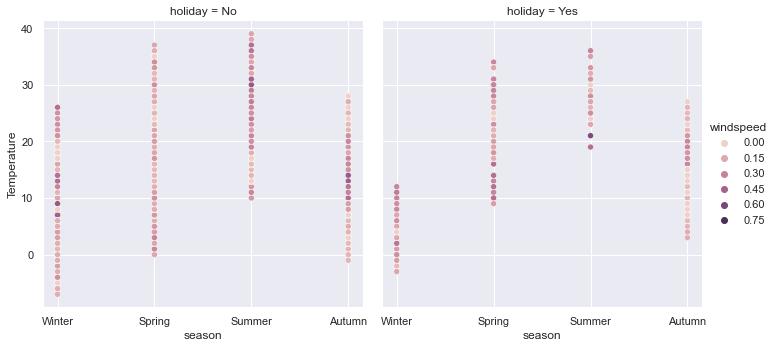

In [439]:
sns.set_theme()

sns.relplot(
    data=bike_hour,
    x="season", y="Temperature", col="holiday",
    hue="windspeed")

<AxesSubplot:xlabel='season', ylabel='weather_label'>

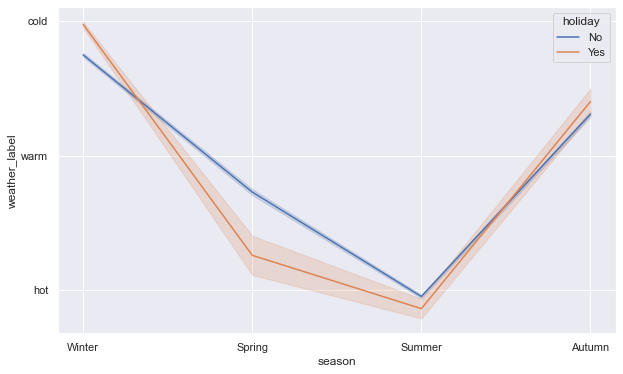

In [440]:
sns.lineplot(
    data=bike_hour,
    x="season", y="weather_label", hue="holiday")

In [441]:
bike_hour.dtypes


instant                        int64
dteday                datetime64[ns]
season                        object
yr                            object
mnth                           int64
hr                             int64
holiday                       object
weekday                       object
workingday                     int64
weathersit                     int64
temp                         float64
atemp                        float64
hum                          float64
windspeed                    float64
casual                         int64
registered                     int64
cnt                            int64
Temperature                    int64
A_Temperature                  int64
weather_label               category
casual user amount          category
dtype: object

<AxesSubplot:xlabel='hr', ylabel='temp'>

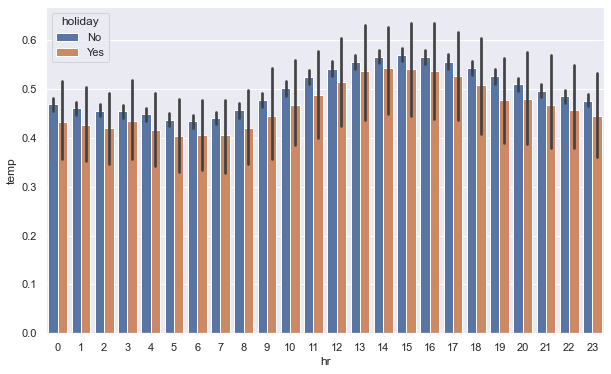

In [442]:
sns.barplot(
    data=bike_hour,
    x="hr", y="temp", hue="holiday")

<AxesSubplot:xlabel='hr', ylabel='casual'>

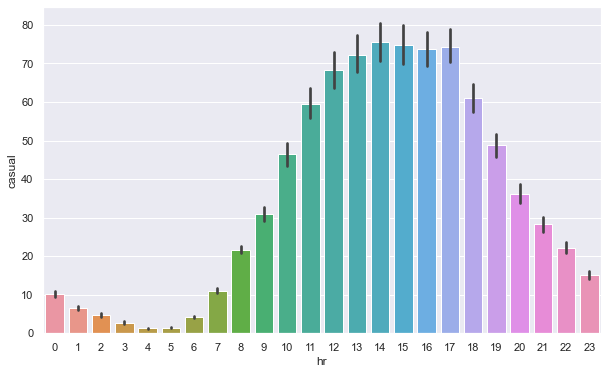

In [443]:

sns.barplot(
    data=bike_hour,
    x="hr", y="casual")

<AxesSubplot:xlabel='hr', ylabel='Temperature'>

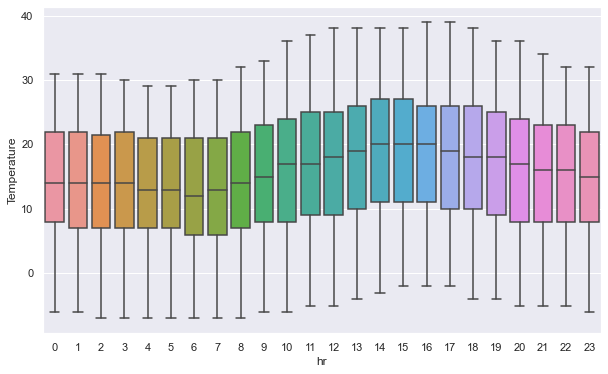

In [444]:
sns.boxplot(
    data=bike_hour,
    x="hr", y="Temperature")

<AxesSubplot:xlabel='weekday', ylabel='casual'>

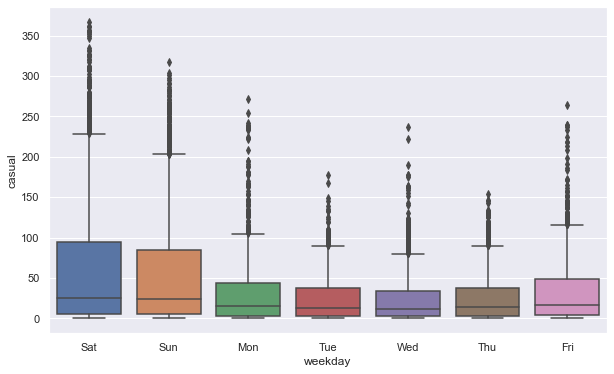

In [445]:
sns.boxplot(
    data=bike_hour,
    x="weekday", y="casual")

In [446]:
#Time series

In [447]:
time_df = bike_hour.groupby("Temperature") ["casual"].sum()
print (time_df.head())

print(type(time_df))

Temperature
-7    16
-6    28
-5    44
-4    33
-3    85
Name: casual, dtype: int64
<class 'pandas.core.series.Series'>


<function matplotlib.pyplot.show(close=None, block=None)>

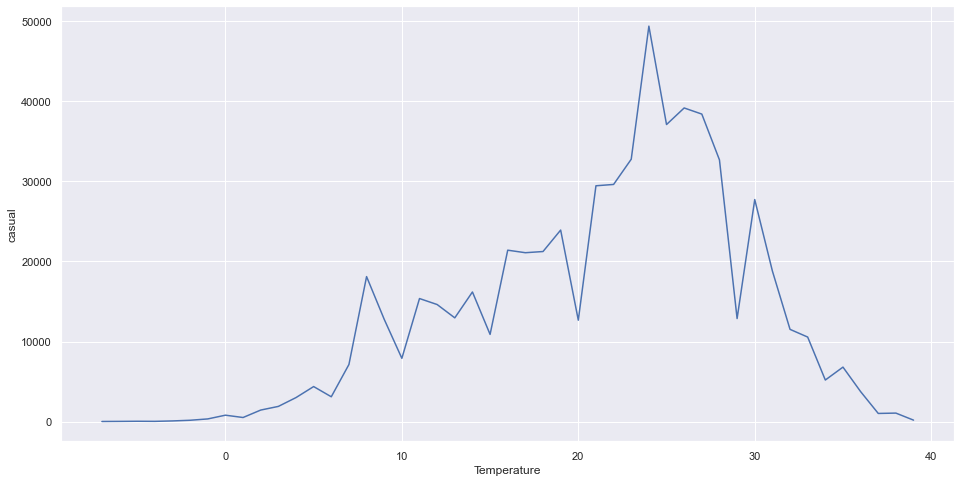

In [448]:
plt.figure(figsize=(16, 8))

sns.lineplot(data= time_df)
plt.show

In [449]:
#plt.figure(figsize=(16, 8))

#sns.barplot(data= time_df)
#plt.show

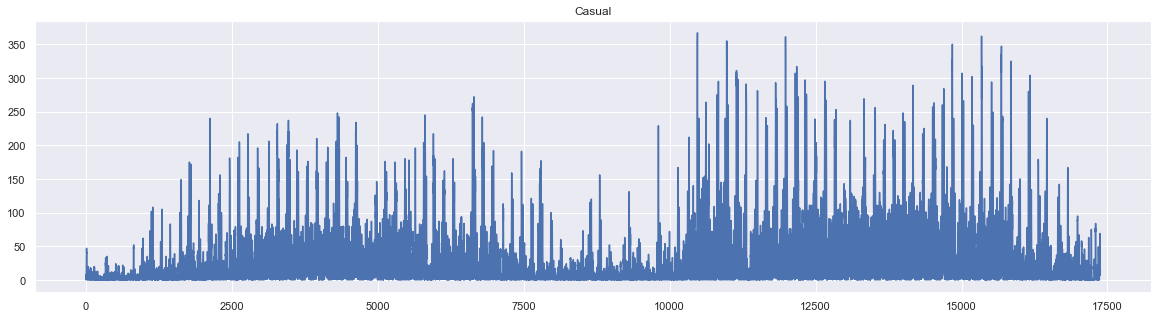

In [450]:
bike_hour.casual.plot(figsize=(20,5),title = "Casual")
plt.show()

#the x axis is made up by the periods the values come from

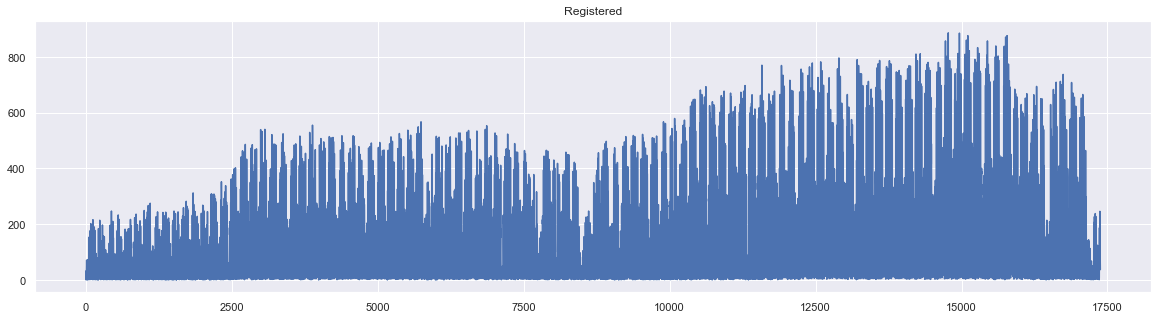

In [451]:
bike_hour.registered.plot(figsize=(20,5),title = "Registered")
plt.show()

#the x axis is made up by the periods the values come from

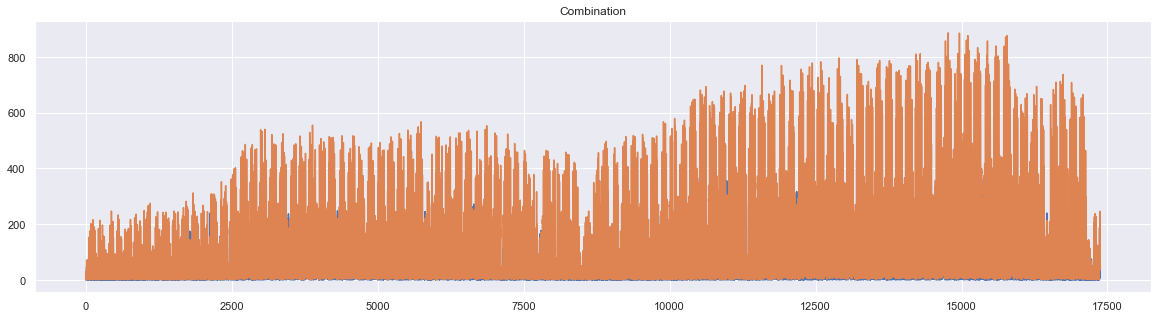

In [452]:
bike_hour.casual.plot(figsize=(20,5),title = "Casual")
bike_hour.registered.plot(figsize=(20,5),title = "Registered")
plt.title("Combination")
plt.show()

In [453]:
#QQ is Quantile Quantile, used to determine whether a data set is distributed a certain way. Usually showcases how the data fits a Normal Distribution. 

import scipy.stats
import pylab


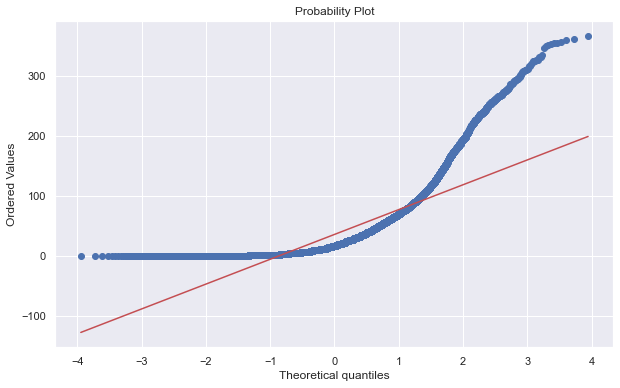

In [454]:
scipy.stats.probplot(bike_hour.casual, plot = pylab)
pylab.show()

#takes all the values a variable can take and arranges them in accending order. Red : what the data points should follow, if they are Normally Disctributed. 

In [455]:
bike_hour.dteday.describe()

/var/folders/6n/sf43sj591qd37_1r77rmw6v00000gn/T/ipykernel_704/3555000497.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_hour.dteday.describe()


count                   17379
unique                    731
top       2011-01-01 00:00:00
freq                       24
first     2011-01-01 00:00:00
last      2012-12-31 00:00:00
Name: dteday, dtype: object

In [456]:
#from Data Ranger

#bike_hour.set_index("dteday", inplace = True)
#bike_hour.dteday = pd.to_datetime(bike_hour.date, dayfirst = True)


In [457]:
sts.adfuller(bike_hour.hr)

(-18.530997304476426,
 2.1031057611527045e-30,
 43,
 17335,
 {'1%': -3.430727286910545,
  '5%': -2.861706746142428,
  '10%': -2.566858754660635},
 65407.57621769637)

In [458]:
#critical values, can be used for levels of significance in our analysis

#'1%': -3.430727286910545,
#'5%': -2.861706746142428,
#'10%': -2.566858754660635},

In [459]:
#get a mean of the usage. y axis vs. hr in x axis

In [460]:
#sns.kdeplot(bike_hour.Temperature, bw_method=50)

In [461]:
a = np.random.gamma(9, size=200)

/Users/monicavillarfuentes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

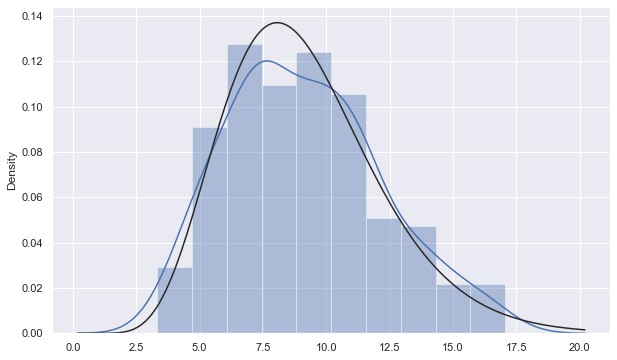

In [462]:
sns.distplot(a,fit=stats.gamma)

In [463]:
b =np.random.beta(7,7, size=200)

/Users/monicavillarfuentes/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

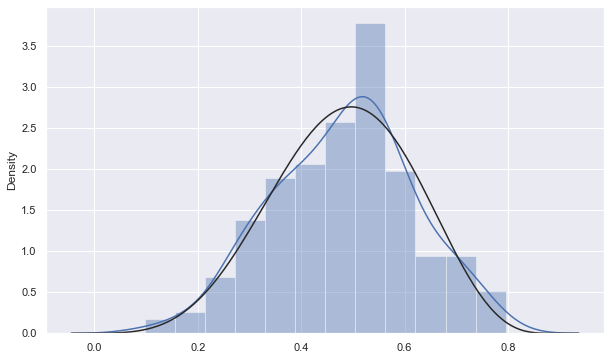

In [464]:
sns.distplot(b, fit=stats.beta)

In [465]:
#sns.relplot(data=bike_hour, x="Temperature", y= "casual", hue="weekday", col="holiday", row="hr")

In [466]:
#sns.relplot(data=bike_hour, x="hr", y="Temperature", col="weekday",hue="casual", style="windspeed")

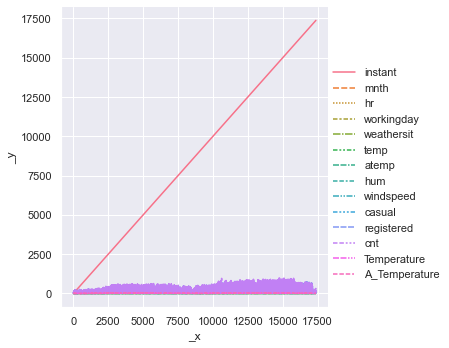

In [467]:
sns.relplot(data=bike_hour, kind="line")

In [468]:
#Start with station data.

In [469]:
bike_station = pd.read_csv('stations.csv')


In [489]:
bike_station.shape

bike_station.info

bike_station.dtypes

member_station = bike_station["Member type"]

member_station

bike_station.dtypes




Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [471]:
winter_df = bike_hour.groupby("season") ["casual"].sum()
print (winter_df.head())

print(type(winter_df))

season
Autumn    129782
Spring    203522
Summer    226091
Winter     60622
Name: casual, dtype: int64
<class 'pandas.core.series.Series'>


In [472]:
winter_usage = bike_hour[bike_hour["season"] == "Winter"]
winter_usage.tail(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,Temperature,A_Temperature,weather_label,casual user amount
17359,17360,2012-12-31,Winter,2012,12,4,No,Mon,1,1,...,0.1667,0.69,0.1045,0,3,3,-1,-4,cold,few
17360,17361,2012-12-31,Winter,2012,12,5,No,Mon,1,1,...,0.1515,0.64,0.1940,0,9,9,0,-6,cold,few
17361,17362,2012-12-31,Winter,2012,12,6,No,Mon,1,1,...,0.1667,0.64,0.1642,0,40,40,0,-4,cold,few
17362,17363,2012-12-31,Winter,2012,12,7,No,Mon,1,1,...,0.1818,0.64,0.1343,2,83,85,0,-4,cold,few
17363,17364,2012-12-31,Winter,2012,12,8,No,Mon,1,1,...,0.1515,0.69,0.1343,9,187,196,-1,-6,cold,few
17364,17365,2012-12-31,Winter,2012,12,9,No,Mon,1,2,...,0.2121,0.64,0.1045,13,144,157,1,-2,cold,some
17365,17366,2012-12-31,Winter,2012,12,10,No,Mon,1,2,...,0.2121,0.69,0.1343,33,87,120,2,-2,cold,a lot
17366,17367,2012-12-31,Winter,2012,12,11,No,Mon,1,2,...,0.2273,0.60,0.1940,43,114,157,3,0,cold,a lot
17367,17368,2012-12-31,Winter,2012,12,12,No,Mon,1,2,...,0.2273,0.56,0.1940,52,172,224,4,0,cold,a lot
17368,17369,2012-12-31,Winter,2012,12,13,No,Mon,1,2,...,0.2576,0.44,0.1642,38,165,203,5,2,cold,a lot


<AxesSubplot:xlabel='dteday', ylabel='casual'>

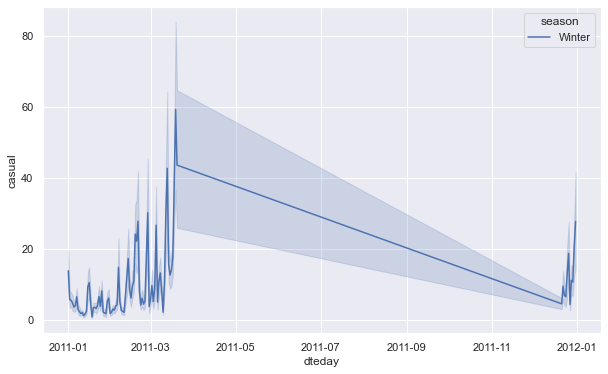

In [473]:
winter_usage2 = bike_hour.query("yr == '2011'")
winter_usage3 = bike_hour.query("season == 'Winter'")

winter_usage4 = pd.merge(winter_usage2, winter_usage3)
winter_usage4

sns.lineplot(data=winter_usage4, x="dteday", y="casual", hue="season")

#display("winter_usage2", "winter_usage3") this didnt help at all.



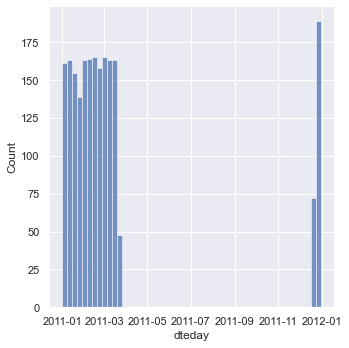

In [474]:
sns.displot(data=winter_usage4, x="dteday")

<AxesSubplot:xlabel='dteday', ylabel='Count'>

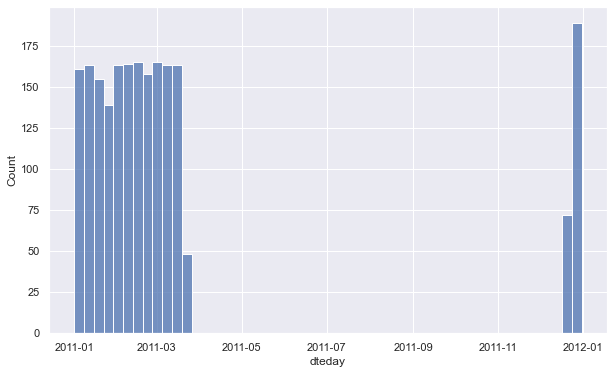

In [475]:
sns.histplot(data=winter_usage4, x="dteday")

<AxesSubplot:xlabel='dteday', ylabel='Density'>

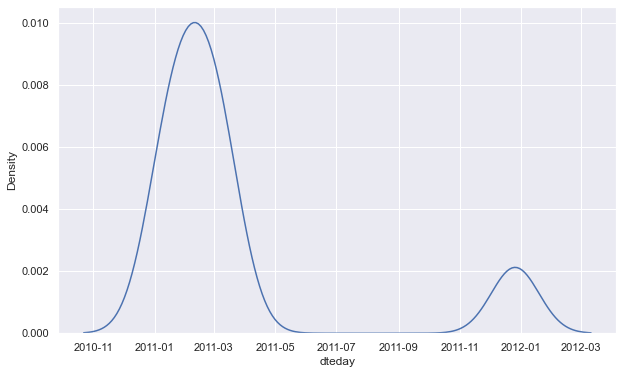

In [476]:
sns.kdeplot(data=winter_usage4, x="dteday")

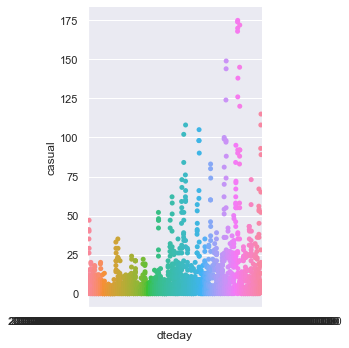

In [477]:
sns.catplot(data=winter_usage4, x="dteday", y="casual")

In [478]:
#sns.catplot(data=winter_usage4, x="dteday", y="casual", col="mnth",kind="bar", height=4, aspect=.6,)

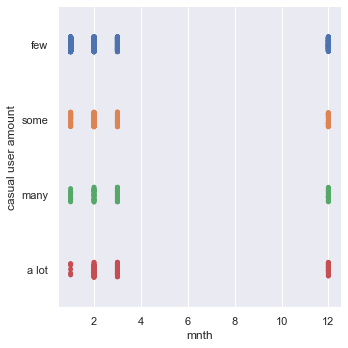

In [479]:
sns.catplot(data=winter_usage4, x="mnth", y="casual user amount")

<AxesSubplot:xlabel='mnth', ylabel='casual'>

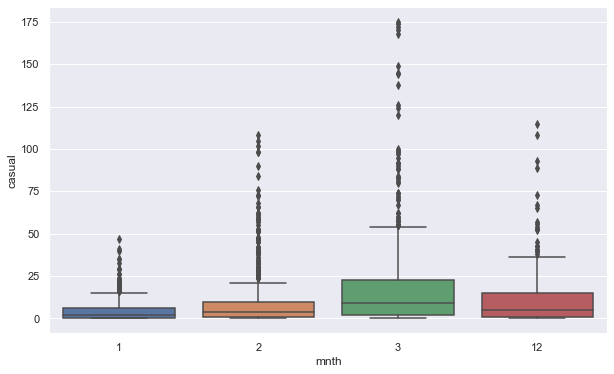

In [480]:
sns.boxplot(data=winter_usage4, x="mnth", y="casual")

<AxesSubplot:xlabel='mnth', ylabel='casual'>

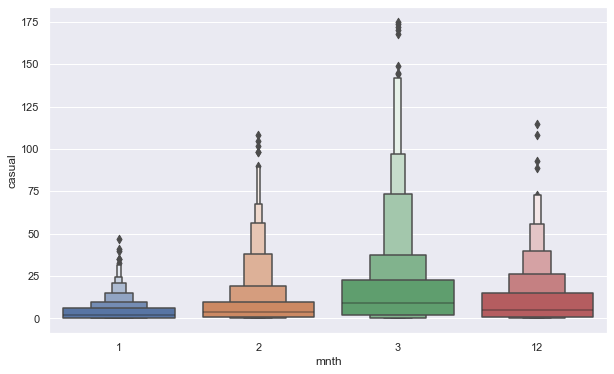

In [481]:
sns.boxenplot(data=winter_usage4, x="mnth", y="casual")

<AxesSubplot:xlabel='mnth', ylabel='casual'>

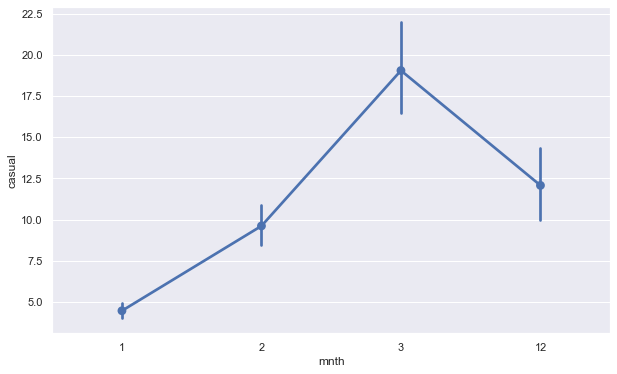

In [482]:
sns.pointplot(data=winter_usage4, x="mnth", y="casual")

<AxesSubplot:xlabel='dteday', ylabel='casual'>

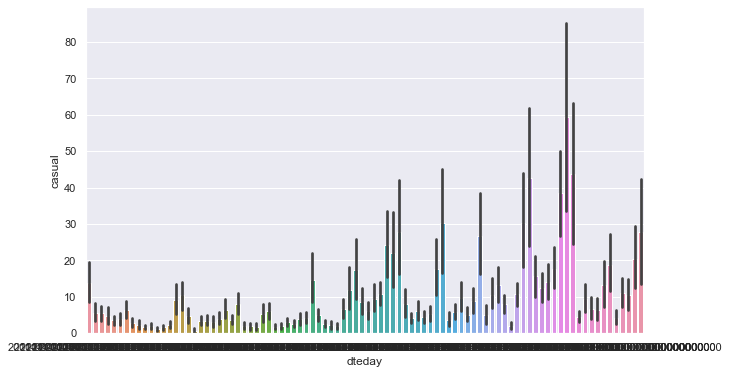

In [483]:
sns.barplot(data=winter_usage4, x="dteday", y="casual")

<AxesSubplot:xlabel='casual user amount', ylabel='count'>

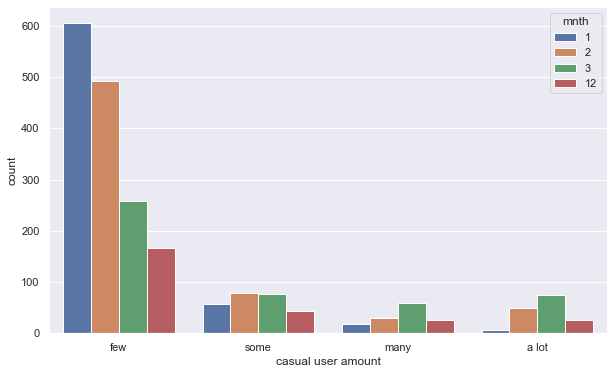

In [484]:
sns.countplot(data=winter_usage4, x="casual user amount", hue="mnth")

<AxesSubplot:xlabel='mnth', ylabel='count'>

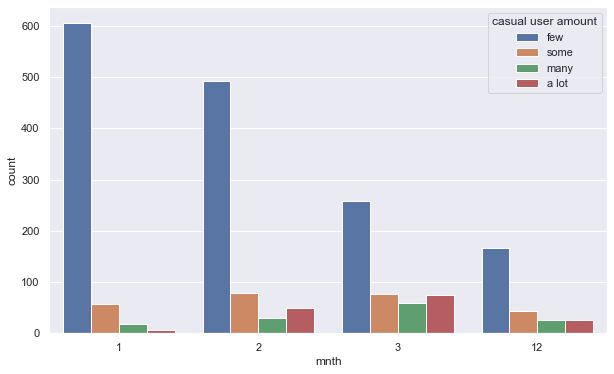

In [485]:
sns.countplot(data=winter_usage4, x="mnth", hue="casual user amount")

In [486]:
#sns.jointplot(data=winter_usage4, x="dteday", y="casual",marker="+", s=100, marginal_kws=dict(bins=25, fill=False))

In [487]:
#g = sns.JointGrid(data=winter_usage4, x="dteday", y="casual", hue="mnth")
#g.plot(sns.scatterplot, sns.histplot)

In [493]:
bike_station

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual
...,...,...,...,...,...,...,...,...,...
1226762,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
1226763,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
1226764,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
1226765,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member


<AxesSubplot:xlabel='Member type', ylabel='count'>

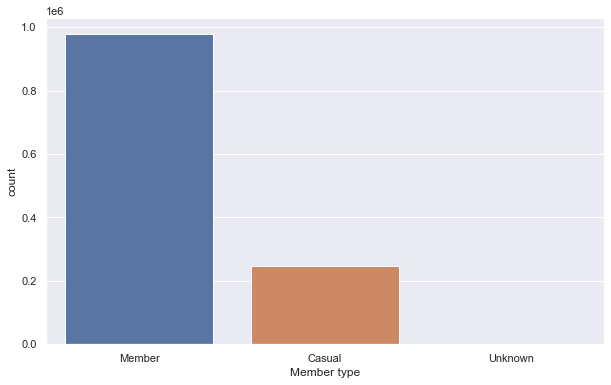

In [498]:
sns.countplot(data=bike_station, x="Member type")

#remove Unknown from the df